## 경사 하강법

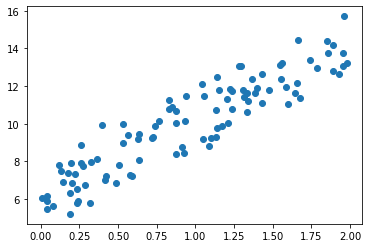

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)

#y=4x+6 이라는 방정식에 노이즈를 붙여 데이터 만들기

X=2 * np.random.rand(100,1)
y=6+ 4*X + np.random.randn(100,1)

plt.scatter(X,y)

In [2]:
def get_cost(y, y_pred):
    N= len(y)
    cost = np.sum (np.square(y-y_pred))/N
    return cost
    

In [10]:
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N=len(y)
    
    w1_update = np.zeros_like(w1)
    w0_update= np.zeros_like(w0)
    
    y_pred= np.dot(X, w1.T) + w0
    diff = y - y_pred
    
    w0_factors =np.ones((N,1))
    
    w1_update = -(2/N)*learning_rate*(np.dot(X.T , diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T , diff))

    return w1_update, w0_update    

def gradient_descent_steps(X, y, iters=10000):
    
    w0=np.zeros((1,1))
    w1=np.zeros((1,1))
    
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    
    return w1, w0

def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y-y_pred))/N
    return cost
    

In [11]:
w1, w0 = gradient_descent_steps(X, y, iters=1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0], w0[0,0]))
y_pred=w1[0,0] * X +w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1:4.022 w0:6.162
Gradient Descent Total Cost:0.9935


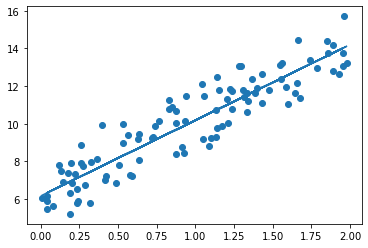

In [12]:
plt.scatter(X, y)
plt.plot(X, y_pred)

In [13]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0= np.zeros((1,1))
    w1= np.zeros((1,1))
    prev_cost=100000
    iter_index=0
    
    for ind in range(iters):
        np.random.seed(ind)
        
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1=w1-w1_update
        w0=w0-w0_update
        
    return w1, w0
        
    

In [14]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print("w1:",round(w1[0,0],3),"w0:",round(w0[0,0],3))
y_pred=w1[0,0]*X+w0
print('Stochastic Gradient Descent Total COst:{0:.4f}'.format(get_cost(y, y_pred)))

w1: 4.028 w0: 6.156
Stochastic Gradient Descent Total COst:0.9937


## 보스턴 주택 가격 예측

### 데이터 분석

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

boston= load_boston()
bostonDF= pd.DataFrame(boston.data, columns= boston.feature_names)
bostonDF['Price']=boston.target

print('Boston 데이터 세트 크기 :', bostonDF.shape)
bostonDF.head()

Boston 데이터 세트 크기 : (506, 14)


C:\Users\2002t\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


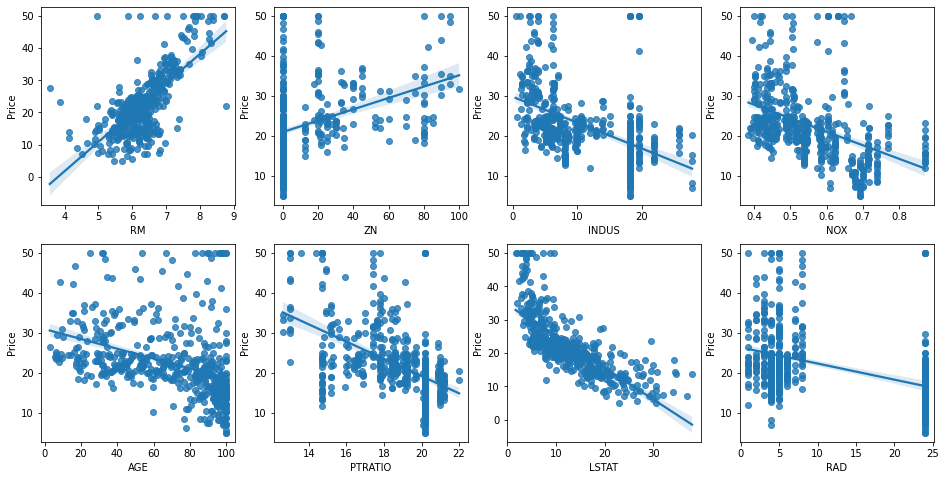

In [8]:
fig, axs = plt.subplots(figsize=(16,8),ncols=4,nrows=2)
lm_features=['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i, feature in enumerate(lm_features):
    row=int(i/4)
    col = i%4
    
    sns.regplot(x=feature, y='Price', data=bostonDF, ax=axs[row][col])

### 모델 설계 (선형회귀)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target= bostonDF['Price']
X_data= bostonDF.drop(['Price'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds= lr.predict(X_test)
mse=mean_squared_error(y_test, y_preds)
rmse=np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse,rmse))
print('Variance score: {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297, RMSE : 4.159
Variance score: 0.757


In [10]:
print('절편 값:',lr.intercept_)
print('회귀 계수값:',np.round(lr.coef_,1))

coeff=pd.Series(data=np.round(lr.coef_,1), index=X_data.columns)
coeff.sort_values(ascending=False)

절편 값: 40.995595172164336
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

### 교차 검증을 통한 최적화

In [11]:
from sklearn.model_selection import cross_val_score

y_target= bostonDF['Price']
X_data= bostonDF.drop(['Price'], axis=1, inplace=False)
lr=LinearRegression()

neg_mse_scores= cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores= np.sqrt(-1* neg_mse_scores)
avg_rmse= np.mean(rmse_scores)

print('5 folds 의 개별 negative MSE scores: ', np.round(neg_mse_scores, 2))
print('5 folds 의 개별 RMSE scores: ', np.round(rmse_scores, 2))
print('5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

5 folds 의 개별 negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds 의 개별 RMSE scores:  [3.53 5.1  5.75 8.99 5.77]
5 folds 의 평균 RMSE : 5.829 


## 다항 회귀

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 피쳐:\n', X)

poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 피처:\n', poly_ftr)

일차 단항식 계수 피쳐:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [13]:
X=np.arange(4).reshape(2,2)
print('일차 단항식 계수 피쳐:\n', X)

#y=1+2x1+3x1^2+4x2^3
y= 1+ 2*X[:,0]+ 3*X[:,0]**2 + 4*X[:,1]**3
print('삼차 다항식 결정값: \n',y)

poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 피처:\n', poly_ftr)

model=LinearRegression()
model.fit(poly_ftr,y)
print('Polynomial 회귀 계수\n', np.round(model.coef_, 2))
print('Polynomial 회귀 Shape :', model.coef_.shape)

일차 단항식 계수 피쳐:
 [[0 1]
 [2 3]]
삼차 다항식 결정값: 
 [  5 125]
3차 다항식 계수 피처:
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape : (10,)


### 코드를 깔끔하게 정리

In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

model=Pipeline([('poly', PolynomialFeatures(degree=3)),('linear',LinearRegression())])
X=np.arange(4).reshape(2,2)
y= 1+ 2*X[:,0]+ 3*X[:,0]**2 + 4*X[:,1]**3

model = model.fit(X, y)

print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_,2))

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


## 과소적합과 과적합

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

np.random.seed(0)
n_samples=30
X=np.sort(np.random.rand(n_samples))

y=np.cos(1.5*np.pi*X)+ np.random.randn(n_samples)*0.1


Degree 1 회귀 계수는 [-1.61]입니다.
Degree 1 MSE 는 0.40772896250986834 입니다.

Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26]입니다.
Degree 4 MSE 는 0.04320874987231747 입니다.

Degree 15 회귀 계수는 [-2.98295000e+03  1.03899930e+05 -1.87417069e+06  2.03717225e+07
 -1.44873988e+08  7.09318780e+08 -2.47066977e+09  6.24564048e+09
 -1.15677067e+10  1.56895696e+10 -1.54006776e+10  1.06457788e+10
 -4.91379977e+09  1.35920330e+09 -1.70381654e+08]입니다.
Degree 15 MSE 는 182815433.47648773 입니다.


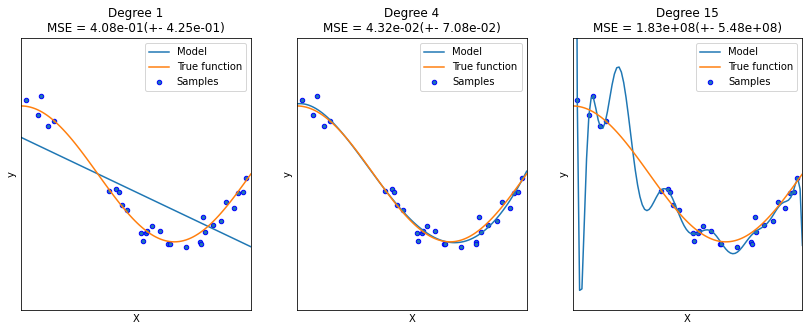

In [16]:
plt.figure(figsize=(14,5))
degrees=[1,4,15]

for i in range(len(degrees)):
    ax=plt.subplot(1,len(degrees),i+1)
    plt.setp(ax,xticks=(),yticks=())
    
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline=Pipeline([("polynomial_features",polynomial_features),
                       ("linear_regression",linear_regression)])
    pipeline.fit(X.reshape(-1,1),y)
    
    scores=cross_val_score(pipeline, X.reshape(-1,1), y, scoring="neg_mean_squared_error", cv=10)
    
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1}입니다.'.format(degrees[i],np.round(coefficients,2)))
    print('Degree {0} MSE 는 {1} 입니다.'.format(degrees[i], -1*np.mean(scores)))
    
    X_test=np.linspace(0,1,100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    
    plt.plot(X_test, np.cos(1.5*np.pi*X_test), '-', label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label='Samples')
    
    plt.xlabel("X")
    plt.ylabel("y")
    plt.xlim((0,1))
    plt.ylim((-2,2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))
    
plt.show()

## 규제 선형 회귀

### 릿지 회귀

In [19]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

ridge = Ridge(alpha=10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(" 5 folds 의 개별 Negative MSE scores: ",np.round(neg_mse_scores, 3))
print(" 5 folds 의 개별 RMSE scores: ",np.round(rmse_scores, 3))
print(" 5 folds 의 평균 RMSE : {0:.3f}".format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-11.422 -24.294 -28.144 -74.599 -28.517]
 5 folds 의 개별 RMSE scores:  [3.38  4.929 5.305 8.637 5.34 ]
 5 folds 의 평균 RMSE : 5.518


In [21]:
alphas = [0, 0.1, 1, 10, 100]

for alpha in alphas:
    ridge = Ridge(alpha = alpha)
    
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
    avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
    print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f}'.format(alpha, avg_rmse))

alpha 0 일 때 5 folds 의 평균 RMSE : 5.829
alpha 0.1 일 때 5 folds 의 평균 RMSE : 5.788
alpha 1 일 때 5 folds 의 평균 RMSE : 5.653
alpha 10 일 때 5 folds 의 평균 RMSE : 5.518
alpha 100 일 때 5 folds 의 평균 RMSE : 5.330


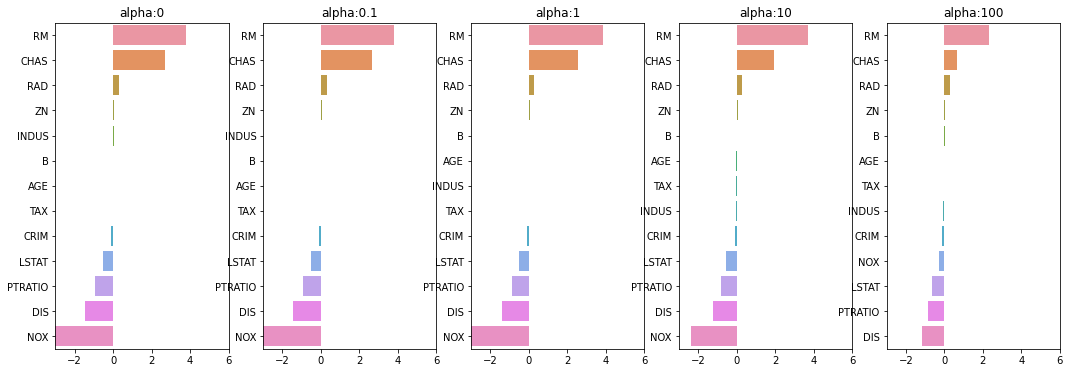

In [22]:
fig, axs = plt.subplots(figsize = (18,6), nrows=1, ncols =5)

coeff_df = pd.DataFrame()

for pos, alpha in enumerate(alphas) :
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_data, y_target)
    
    coeff= pd.Series(data = ridge.coef_, index= X_data.columns)
    colname='alpha:'+str(alpha)
    coeff_df[colname] = coeff
    
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y=coeff.index, ax = axs[pos])
    

plt.show()

In [24]:
ridge_alphas = [0, 0.1, 1, 10, 100]
sort_column = 'alpha:' +str(alpha)
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
NOX,-17.766611,-16.684645,-10.777015,-2.371619,-0.262847


In [37]:
from sklearn.linear_model import Lasso, ElasticNet

def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose : print('####### ', model_name, ' #######')
    for param in params:
        if model_name == 'Ridge': model= Ridge(alpha = param)
        elif model_name == 'Lasso': model= Lasso(alpha = param)
        elif model_name == 'ElasticNet' : model = ElasticNet(alpha = param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, scoring="neg_mean_squared_error", cv=5)
        avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
        print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f}'.format(param, avg_rmse))
        
        model.fit(X_data_n, y_target_n)
        if return_coeff:
            coeff = pd.Series(data=model.coef_, index= X_data_n.columns)
            colname='alpha:'+str(param)
            coeff_df[colname]=coeff
            
    return coeff_df

### 라쏘 회귀

In [38]:
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_data, y_target_n = y_target)

#######  Lasso  #######
alpha 0.07 일 때 5 folds 의 평균 RMSE : 5.612
alpha 0.1 일 때 5 folds 의 평균 RMSE : 5.615
alpha 0.5 일 때 5 folds 의 평균 RMSE : 5.669
alpha 1 일 때 5 folds 의 평균 RMSE : 5.776
alpha 3 일 때 5 folds 의 평균 RMSE : 6.189


In [39]:
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


### 엘라스틱넷 회귀

In [40]:
elastic_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_elastico_df = get_linear_reg_eval('ElasticNet', params=elastic_alphas, X_data_n=X_data, y_target_n = y_target)

#######  ElasticNet  #######
alpha 0.07 일 때 5 folds 의 평균 RMSE : 5.542
alpha 0.1 일 때 5 folds 의 평균 RMSE : 5.526
alpha 0.5 일 때 5 folds 의 평균 RMSE : 5.467
alpha 1 일 때 5 folds 의 평균 RMSE : 5.597
alpha 3 일 때 5 folds 의 평균 RMSE : 6.068


In [41]:
sort_column = 'alpha:'+str(elastic_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


### 선형 회귀를 위한 데이터 변환

In [42]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
def get_scaled_data(method:'None', p_degree:None, input_data:None):
    if method == 'Standard':
        scaled_data= StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data= MinMaxScaler().fit_transform(input_data)        
    elif method == 'Log':
        scaled_data= np.log1p(input_data)
    else:
        scaled_data=input_data
    
    if p_degree != None:
        scaled_data=PolynomialFeatures(degree=p_degree, include_bias=False).fit_transform(scaled_data)
        
    return scaled_data    
    

In [43]:
alphas=[0.1, 1, 10, 100]

scale_methods=[(None, None), ('Standard', None), ('Standard', 2), ('MinMax', None), ('MinMax', 2), ('Log', None)]

for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method= scale_method[0], p_degree=scale_method[1], input_data=X_data)
    print('\n## 변환 유형:{0}, Polynomial Degree:{1}'.format(scale_method[0], scale_method[1]))
    get_linear_reg_eval('Ridge', params=alphas, X_data_n= X_data_scaled, y_target_n=y_target, verbose= False, return_coeff=False)
    


## 변환 유형:None, Polynomial Degree:None
alpha 0.1 일 때 5 folds 의 평균 RMSE : 5.788
alpha 1 일 때 5 folds 의 평균 RMSE : 5.653
alpha 10 일 때 5 folds 의 평균 RMSE : 5.518
alpha 100 일 때 5 folds 의 평균 RMSE : 5.330

## 변환 유형:Standard, Polynomial Degree:None
alpha 0.1 일 때 5 folds 의 평균 RMSE : 5.826
alpha 1 일 때 5 folds 의 평균 RMSE : 5.803
alpha 10 일 때 5 folds 의 평균 RMSE : 5.637
alpha 100 일 때 5 folds 의 평균 RMSE : 5.421

## 변환 유형:Standard, Polynomial Degree:2
alpha 0.1 일 때 5 folds 의 평균 RMSE : 8.827
alpha 1 일 때 5 folds 의 평균 RMSE : 6.871
alpha 10 일 때 5 folds 의 평균 RMSE : 5.485
alpha 100 일 때 5 folds 의 평균 RMSE : 4.634

## 변환 유형:MinMax, Polynomial Degree:None
alpha 0.1 일 때 5 folds 의 평균 RMSE : 5.764
alpha 1 일 때 5 folds 의 평균 RMSE : 5.465
alpha 10 일 때 5 folds 의 평균 RMSE : 5.754
alpha 100 일 때 5 folds 의 평균 RMSE : 7.635

## 변환 유형:MinMax, Polynomial Degree:2
alpha 0.1 일 때 5 folds 의 평균 RMSE : 5.298
alpha 1 일 때 5 folds 의 평균 RMSE : 4.323
alpha 10 일 때 5 folds 의 평균 RMSE : 5.185
alpha 100 일 때 5 folds 의 평균 RMSE : 6.538

## 변환 유형:Log,

## 로지스틱 회귀

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()

In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
data_scaled= scaler.fit_transform(cancer.data)

X_train, X_test, y_train, y_test = train_test_split(data_scaled, cancer.target, test_size=0.3, random_state=0)


In [51]:
from sklearn.metrics import accuracy_score, roc_auc_score


lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)

print('accuracy: {:0.3f}'.format(accuracy_score(y_test, lr_preds)))
print('roc_auc: {:0.3f}'.format(roc_auc_score(y_test , lr_preds)))

accuracy: 0.977
roc_auc: 0.972


In [57]:
from sklearn.model_selection import GridSearchCV

params={'penalty':['l2', 'l1'],
        'C':[0.01, 0.1, 1, 1, 5, 10]}

grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=3,)
grid_clf.fit(data_scaled, cancer.target)
print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_, 
                                                  grid_clf.best_score_))

최적 하이퍼 파라미터:{'C': 1, 'penalty': 'l2'}, 최적 평균 정확도:0.975


C:\Users\2002t\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
18 fits failed out of a total of 36.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\2002t\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\2002t\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\2002t\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Valu

## 결정 트리

In [2]:
def get_model_cv_prediction(model, X_data, y_target):
    neg_mse_scores = cross_val_score (model, X_data, y_target, scoring = "neg_mean_squared_error", cv=5)
    rmse_scores = np.sqrt(-1*neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('##### ',model.__class__.__name__, ' #####')
    print(' 5 교차 검증의 평균 RMSE : {0:.3f} '.format(avg_rmse))

In [5]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import pandas as pd
import numpy as np

boston = load_boston()
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)
bostonDF['Price'] = boston.target
y_target = bostonDF['Price']
X_data = bostonDF.drop(['Price'], axis=1, inplace=False)

dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb_reg = XGBRegressor(n_estimators=1000)
lgb_reg = LGBMRegressor(n_estimators= 1000)

models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in models:
    get_model_cv_prediction(model, X_data, y_target)

C:\Users\2002t\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

#####  DecisionTreeRegressor  #####
 5 교차 검증의 평균 RMSE : 5.978 
#####  RandomForestRegressor  #####
 5 교차 검증의 평균 RMSE : 4.423 
#####  GradientBoostingRegressor  #####
 5 교차 검증의 평균 RMSE : 4.269 
#####  XGBRegressor  #####
 5 교차 검증의 평균 RMSE : 4.251 
#####  LGBMRegressor  #####
 5 교차 검증의 평균 RMSE : 4.646 


<AxesSubplot:>

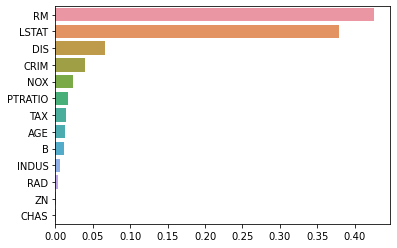

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(X_data, y_target)

feature_series= pd.Series(data=rf_reg.feature_importances_, index=X_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)

(100, 2)


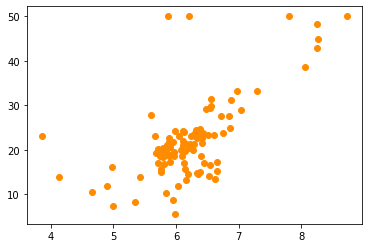

In [11]:
bostonDF_sample = bostonDF[['RM', 'Price']] 
bostonDF_sample = bostonDF_sample.sample(n=100, random_state=0)
print(bostonDF_sample.shape)
plt.figure()
plt.scatter(bostonDF_sample.RM, bostonDF_sample.Price, c= "darkorange")

In [13]:
import numpy as np
from sklearn.linear_model import LinearRegression

lr_reg = LinearRegression()
rf_reg2= DecisionTreeRegressor(max_depth = 2)
rf_reg7 = DecisionTreeRegressor(max_depth = 7)

X_test = np.arange(4.5, 8.5, 0.04).reshape(-1,1)
X_feature = bostonDF_sample['RM'].values.reshape(-1,1)
y_target = bostonDF_sample['Price'].values.reshape(-1,1)

lr_reg.fit(X_feature, y_target)
rf_reg2.fit(X_feature, y_target)
rf_reg7.fit(X_feature, y_target)

pred_lr= lr_reg.predict(X_test)
pred_rf2= rf_reg2.predict(X_test) 
pred_rf7= rf_reg7.predict(X_test)

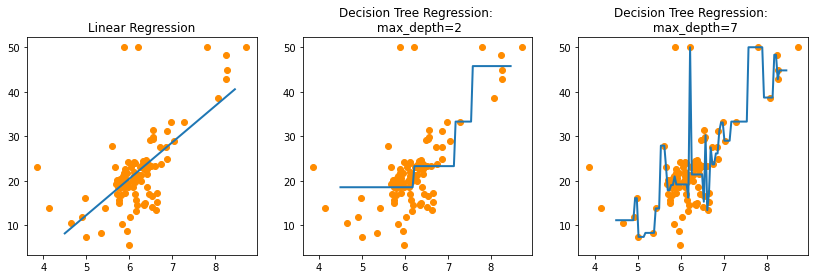

In [16]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(14,4), ncols=3)

ax1.set_title('Linear Regression')
ax1.scatter(bostonDF_sample.RM, bostonDF_sample.Price, c="darkorange")
ax1.plot(X_test,pred_lr,label="linear", linewidth=2)

ax2.set_title('Decision Tree Regression: \n max_depth=2')
ax2.scatter(bostonDF_sample.RM, bostonDF_sample.Price, c="darkorange")
ax2.plot(X_test,pred_rf2,label="max_depth:3", linewidth=2)

ax3.set_title('Decision Tree Regression: \n max_depth=7')
ax3.scatter(bostonDF_sample.RM, bostonDF_sample.Price, c="darkorange")
ax3.plot(X_test,pred_rf7,label="max_depth:7", linewidth=2)

## 자전거 대여 수요 예측

### 데이터 분석 및 가공

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category = RuntimeWarning)

bike_df= pd.read_csv('./bike_train.csv')
print(bike_df.shape)
bike_df.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [21]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [22]:
bike_df['datetime'] = bike_df.datetime.apply(pd.to_datetime)
bike_df['year'] = bike_df.datetime.apply(lambda x : x.year)
bike_df['month']= bike_df.datetime.apply(lambda x: x.month)
bike_df['day']= bike_df.datetime.apply(lambda x : x.day)
bike_df['hour'] = bike_df.datetime.apply(lambda x : x.hour)

drop_columns=['datetime', 'casual', 'registered']
bike_df.drop(drop_columns, axis=1, inplace=True)

### 평가 함수

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def rmsle(y,pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

def rmse(y,pred):
    return np.sqrt(mean_squared_error(y,pred))

def evaluate_regr(y,pred):
    rmsle_val = rmsle(y, pred)
    rmse_val = rmse(y, pred)
    mae_val = mean_absolute_error(y, pred)
    
    print('RMSLE: {0:.3f}, RMSE: {1:.3f}, MAE: {2:.3f}'.format(rmsle_val, rmse_val, mae_val))

### 단순 선형 변환 시도

In [53]:


y_target=bike_df['count']
X_features = bike_df.drop(['count'], axis=1, inplace=False)

### 로그 변환

<AxesSubplot:>

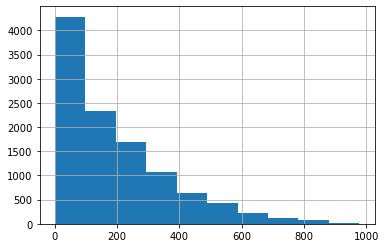

In [54]:
y_target.hist()

<AxesSubplot:>

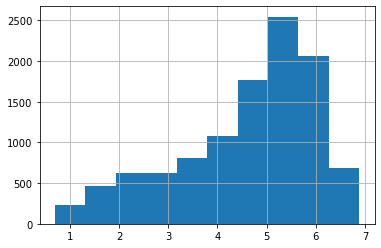

In [55]:
y_log_transform=np.log1p(y_target)
y_log_transform.hist()

### 원-핫 인코딩

In [56]:
X_features_ohe = pd.get_dummies(X_features, columns= ['year', 'month', 'day', 'hour', 'holiday', 'workingday', 'season', 'weather'])

### 선형, 릿지, 라쏘 회귀 

In [57]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split (X_features_ohe, y_target_log, test_size=0.3, random_state= 0)

def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1 :
        y_test= np.expm1(y_test)
        pred = np. expm1(pred)
    print('###', model.__class__.__name__,'###')
    evaluate_regr(y_test,pred)
    
lr_reg= LinearRegression()
ridge_reg= Ridge(alpha=10)
lasso_reg= Lasso(alpha=0.01)

for model in [lr_reg, ridge_reg, lasso_reg]:
    get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=True)

### LinearRegression ###
RMSLE: 0.590, RMSE: 97.687, MAE: 63.382
### Ridge ###
RMSLE: 0.590, RMSE: 98.529, MAE: 63.893
### Lasso ###
RMSLE: 0.635, RMSE: 113.219, MAE: 72.803


### 회귀 트리

In [58]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

rf_reg = RandomForestRegressor(n_estimators =500)
gbm_reg = GradientBoostingRegressor(n_estimators = 500)
xgb_reg = XGBRegressor(n_estimators=500)
lgbm_reg = LGBMRegressor(n_estimators=500)

for model in [rf_reg, gbm_reg, xgb_reg, lgbm_reg]:
    get_model_predict(model, X_train.values, X_test.values, y_train.values, y_test.values, is_expm1=True)


### RandomForestRegressor ###
RMSLE: 0.355, RMSE: 50.261, MAE: 31.075
### GradientBoostingRegressor ###
RMSLE: 0.330, RMSE: 53.315, MAE: 32.729
### XGBRegressor ###
RMSLE: 0.342, RMSE: 51.732, MAE: 31.251
### LGBMRegressor ###
RMSLE: 0.319, RMSE: 47.215, MAE: 29.029


## 회귀 실습 - 캐글 주택 가격: 고급 회귀 기법

### 데이터 사전 처리

In [65]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

house_df_org = pd.read_csv('house_price.csv')
house_df= house_df_org.copy()
house_df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [66]:
print('데이터 세트의 Shape:', house_df.shape)
print('\n전체 피처의 type \n', house_df.dtypes.value_counts())
isnull_series = house_df.isnull().sum()
print('\nNull 칼럼과 그 건수:\n ', isnull_series[isnull_series >0].sort_values(ascending=False))

데이터 세트의 Shape: (1460, 81)

전체 피처의 type 
 object     43
int64      35
float64     3
dtype: int64

Null 칼럼과 그 건수:
  PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64


In [67]:
original_SalePrice = house_df['SalePrice']

#log 를 통해 정규 분포화
house_df ['SalePrice'] = np.log1p(house_df['SalePrice'])

#필요없는 Column 제거
house_df.drop(['Id', 'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1, inplace=True)

#int, float 형 column 의 NULL 은 평균값으로 대체
house_df.fillna(house_df.mean(), inplace=True)

#One-Hot encoding 을 통해 object 형 column 의 NULL 처리
house_df_ohe= pd.get_dummies(house_df)


### 선형 회귀 모델 학습 / 예측 /평가